# Import Libraries and Set Paths

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plotting config
%matplotlib inline
sns.set(color_codes=True)
sns.set(font_scale=1)

%load_ext autoreload
%autoreload 2

DATA_DIR = './data'

# Load Data

In [2]:
# Load data
trainpath = os.path.join(DATA_DIR, 'train.csv')
train = pd.read_csv(trainpath)
testpath = os.path.join(DATA_DIR, 'test.csv')
test = pd.read_csv(testpath)

# Preview Data

In [3]:
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(test.shape)
test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(train.get_dtype_counts(),"\n")
print("---------------------------------------")
print(train.info())

float64     3
int64      35
object     43
dtype: int64 

---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofSt

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
print('-------------------------------TRAIN-------------------------------')
nullcolstrain = train.columns[train.isnull().any()]
print(nullcolstrain)
print(train[nullcolstrain].isnull().sum())

print()

print('-------------------------------TEST-------------------------------')
nullcolstest = test.columns[test.isnull().any()]
print(nullcolstest)
print(test[nullcolstest].isnull().sum())

-------------------------------TRAIN-------------------------------
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

-------------------------------TEST-------------------------------
Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', '

### Correlation

In [8]:
corrSalePrice = train.corr()["SalePrice"]
corrSalePrice[np.argsort(corrSalePrice)][::-1]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

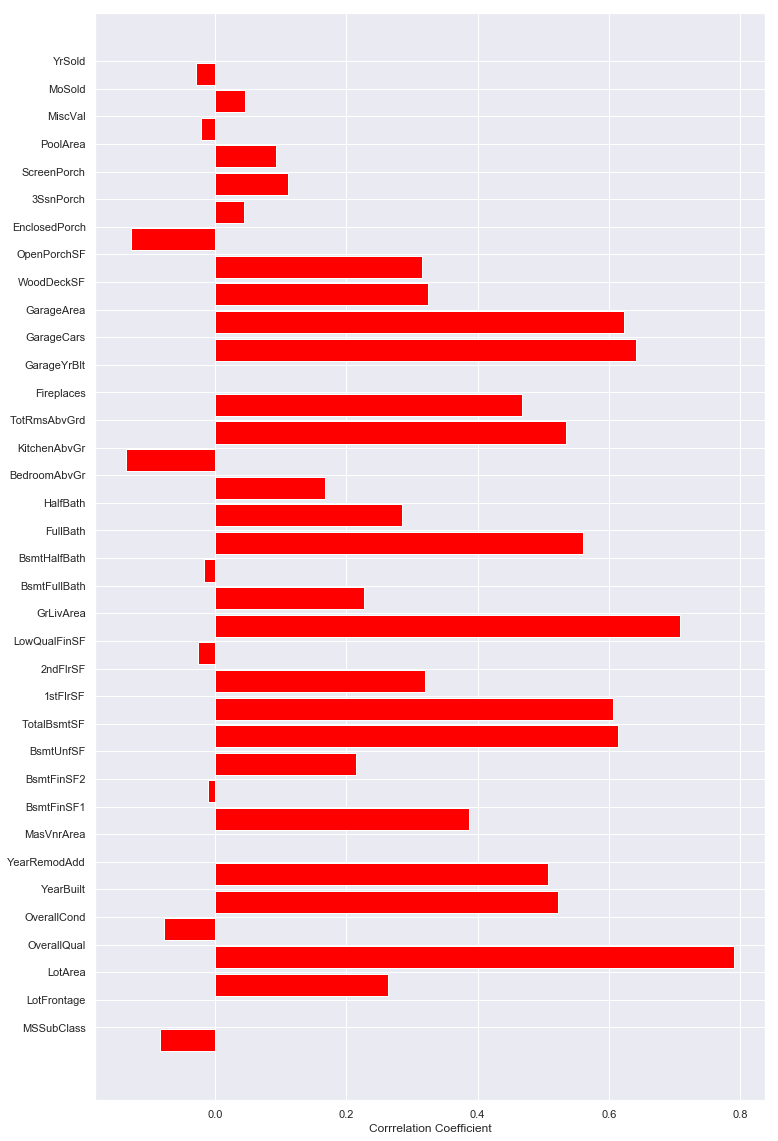

In [9]:
num_feat = train.columns[train.dtypes != object]
num_feat = num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train['SalePrice'].values)[0, 1])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12, 20))
ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+(width/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Corrrelation Coefficient")
plt.show()

In [10]:
corr = train.corr()
corr = corr.iloc[:-1,:-1] # Get rid of SalePrice row and col

thresh = 0.5
importantcorrs = corr[abs(corr) > thresh][corr != 1.0].unstack().dropna().to_dict()
pairs = set([(tuple(sorted(attr)), importantcorrs[attr]) for attr in importantcorrs])
pairs = pd.DataFrame(list(pairs), columns=['Feature Pair', 'Correlation'])
pairs.sort_values(by='Correlation', ascending=False)

,Feature Pair,Correlation
26,"(GarageArea, GarageCars)",0.882475
12,"(GarageYrBlt, YearBuilt)",0.825667
15,"(GrLivArea, TotRmsAbvGrd)",0.825489
2,"(1stFlrSF, TotalBsmtSF)",0.819530
19,"(2ndFlrSF, GrLivArea)",0.687501
18,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
24,"(BsmtFinSF1, BsmtFullBath)",0.649212
27,"(GarageYrBlt, YearRemodAdd)",0.642277
9,"(FullBath, GrLivArea)",0.630012
6,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


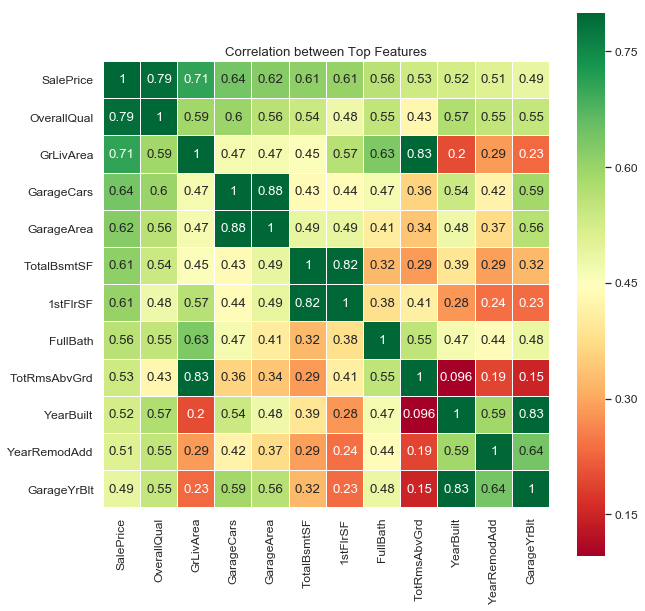

In [11]:
corrMat = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                      'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
                      'YearRemodAdd', 'GarageYrBlt']].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10,10))

sns.heatmap(corrMat, vmax=0.8, linewidths=0.01, 
            square=True, annot=True, cmap='RdYlGn', linecolor='white')
plt.title('Correlation between Top Features')
plt.show()

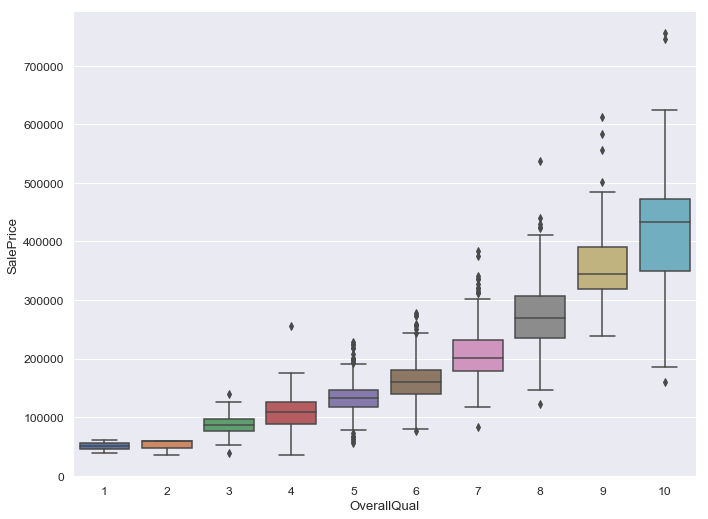

In [12]:
# OverallQual
qualvSP = sns.catplot(x="OverallQual", y="SalePrice", kind="box", data=train)
qualvSP.fig.set_figheight(8)
qualvSP.fig.set_figwidth(12)
plt.show()

# Pre-processing

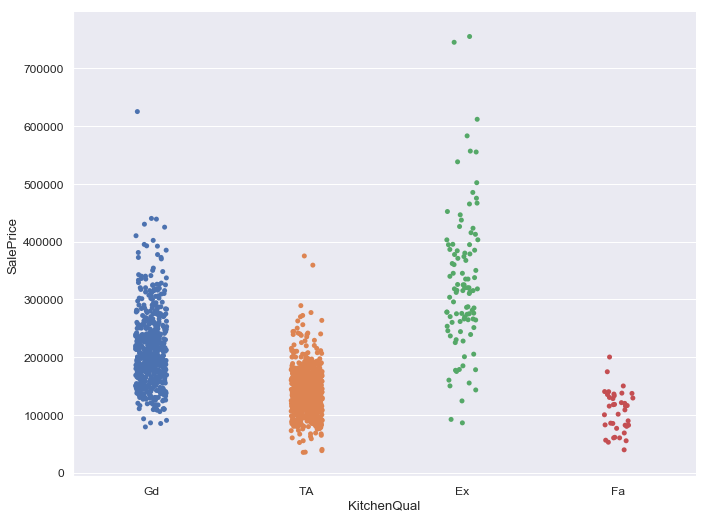

KitchenQual
Ex    100
Fa     39
Gd    586
TA    735
Name: Id, dtype: int64

In [13]:
KitchenvSP = sns.catplot(x="KitchenQual", y="SalePrice", data=train)
KitchenvSP.fig.set_figheight(8)
KitchenvSP.fig.set_figwidth(12)
plt.show()

train.groupby('KitchenQual').count()["Id"]

In [14]:
# Impute with most common category
train["KitchenQual"] = train["KitchenQual"].fillna("TA")
test["KitchenQual"] = train["KitchenQual"].fillna("TA")

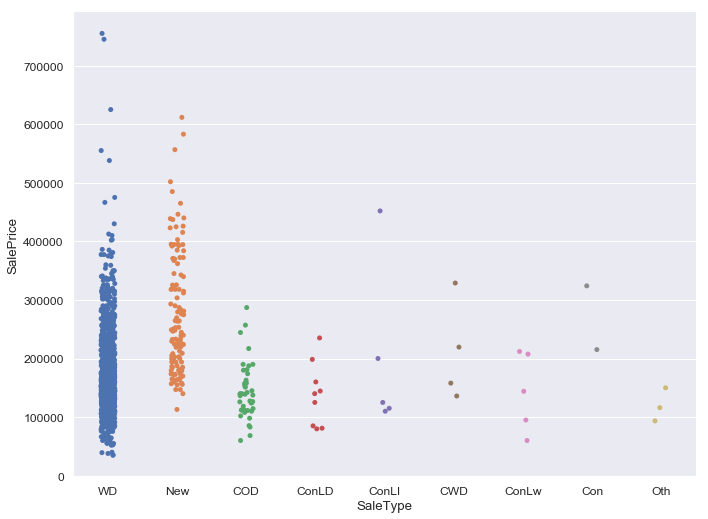

SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       122
Oth         3
WD       1267
Name: Id, dtype: int64

In [15]:
STvSP = sns.catplot(x="SaleType", y="SalePrice", data=train)
STvSP.fig.set_figheight(8)
STvSP.fig.set_figwidth(12)
plt.show()

train.groupby('SaleType').count()["Id"]

In [16]:
# Impute with most common category
train["SaleType"] = train["SaleType"].fillna("WD")
test["SaleType"] = test["SaleType"].fillna("WD")

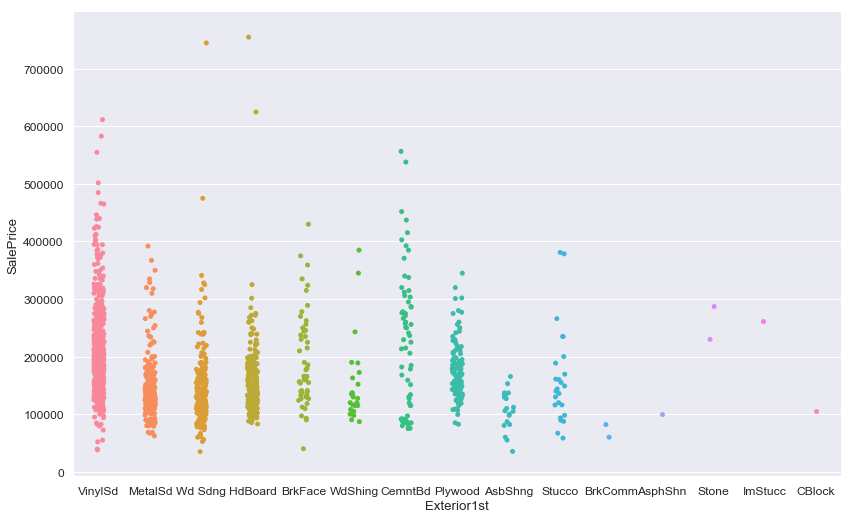

Exterior1st
AsbShng     20
AsphShn      1
BrkComm      2
BrkFace     50
CBlock       1
CemntBd     61
HdBoard    222
ImStucc      1
MetalSd    220
Plywood    108
Stone        2
Stucco      25
VinylSd    515
Wd Sdng    206
WdShing     26
Name: Id, dtype: int64

In [17]:
Ext1stvSP = sns.catplot(x="Exterior1st", y="SalePrice", data=train)
Ext1stvSP.fig.set_figheight(8)
Ext1stvSP.fig.set_figwidth(15)
plt.show()

train.groupby('Exterior1st').count()["Id"]

In [18]:
train["Exterior1st"] = train["Exterior1st"].fillna("VinylSd")
test["Exterior1st"] = test["Exterior1st"].fillna("VinylSd")

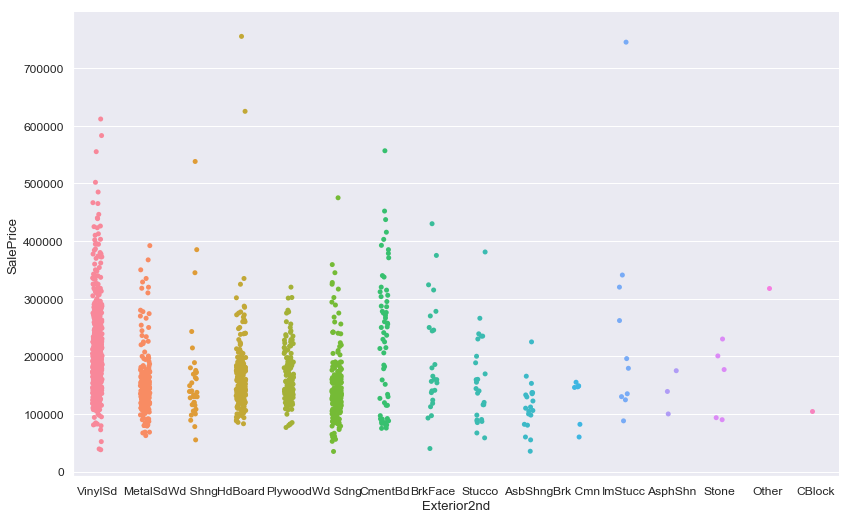

Exterior2nd
AsbShng     20
AsphShn      3
Brk Cmn      7
BrkFace     25
CBlock       1
CmentBd     60
HdBoard    207
ImStucc     10
MetalSd    214
Other        1
Plywood    142
Stone        5
Stucco      26
VinylSd    504
Wd Sdng    197
Wd Shng     38
Name: Id, dtype: int64

In [19]:
Ext2ndvSP = sns.catplot(x="Exterior2nd", y="SalePrice", data=train)
Ext2ndvSP.fig.set_figheight(8)
Ext2ndvSP.fig.set_figwidth(15)
plt.show()

train.groupby('Exterior2nd').count()["Id"]

In [20]:
train["Exterior2nd"] = train["Exterior2nd"].fillna("VinylSd")
test["Exterior2nd"] = test["Exterior2nd"].fillna("VinylSd")

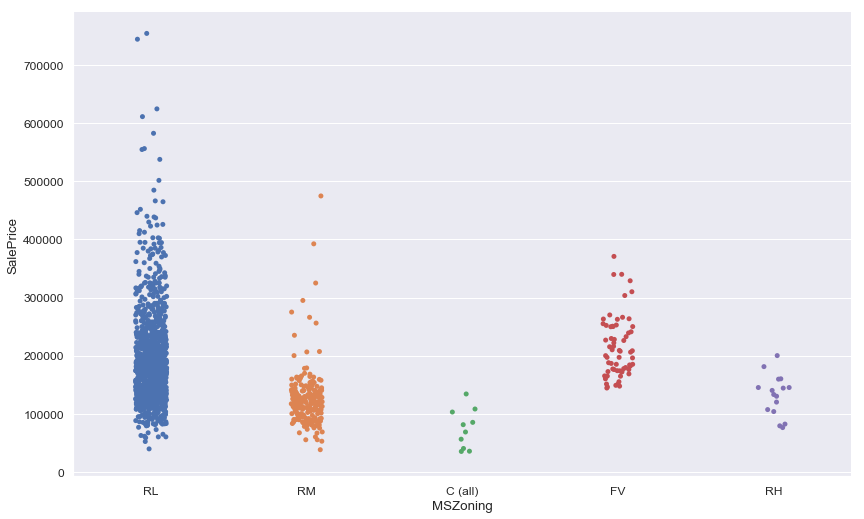

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: Id, dtype: int64

In [21]:
MSZvSP = sns.catplot(x="MSZoning", y="SalePrice", data=train)
MSZvSP.fig.set_figheight(8)
MSZvSP.fig.set_figwidth(15)
plt.show()

train.groupby('MSZoning').count()["Id"]

In [22]:
train["MSZoning"] = train["MSZoning"].fillna("RL")
test["MSZoning"] = test["MSZoning"].fillna("RL")

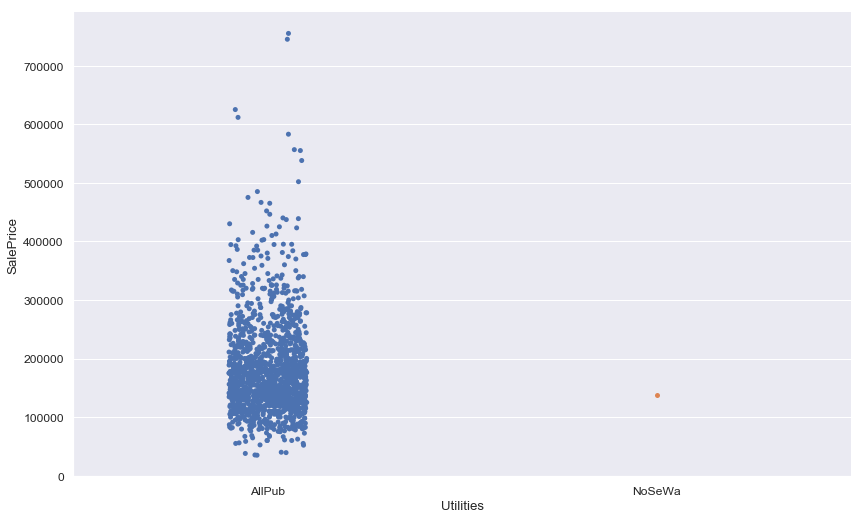

In [23]:
UtilvSP = sns.catplot(x="Utilities", y="SalePrice", data=train)
UtilvSP.fig.set_figheight(8)
UtilvSP.fig.set_figwidth(15)
plt.show()

In [24]:
train["Utilities"] = train["Utilities"].fillna("AllPub")
test["Utilities"] = test["Utilities"].fillna("AllPub")

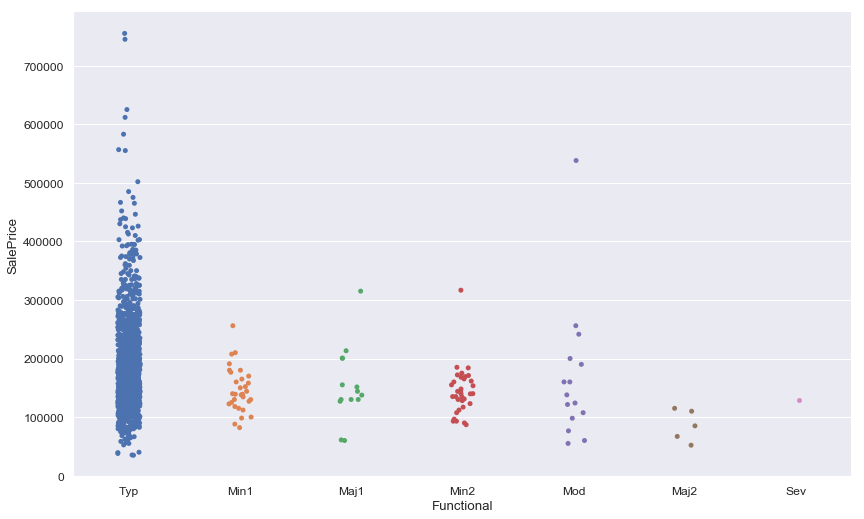

In [25]:
FuncvSP = sns.catplot(x="Functional", y="SalePrice", data=train)
FuncvSP.fig.set_figheight(8)
FuncvSP.fig.set_figwidth(15)
plt.show()

In [26]:
train["Functional"] = train["Functional"].fillna("Typ")
test["Functional"] = test["Functional"].fillna("Typ")

In [27]:
easyImputationCols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                      'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
                      'GarageYrBlt', 'GarageFinish', 'BsmtFinSF1', 'BsmtFinSF2', 
                      'BsmtUnfSF', 'GarageQual', 'GarageCond', 'PoolQC', 
                      'Fence', 'MiscFeature', 'BsmtUnfSF', 'TotalBsmtSF', 
                      'BsmtFullBath', 'BsmtHalfBath']

for col in easyImputationCols:
    if train[col].dtype == np.object:
        train[col] = train[col].fillna('None')
        test[col] = test[col].fillna('None')
    else:
        train[col] = train[col].fillna(0)
        test[col] = test[col].fillna(0)

print('-------------------------------TRAIN-------------------------------')
nullcolstrain = train.columns[train.isnull().any()]
print(nullcolstrain)
print(train[nullcolstrain].isnull().sum())

print()

print('-------------------------------TEST-------------------------------')
nullcolstest = test.columns[test.isnull().any()]
print(nullcolstest)
print(test[nullcolstest].isnull().sum())



-------------------------------TRAIN-------------------------------
Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical'], dtype='object')
LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

-------------------------------TEST-------------------------------
Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'GarageCars', 'GarageArea'], dtype='object')
LotFrontage    227
MasVnrType      16
MasVnrArea      15
GarageCars       1
GarageArea       1
dtype: int64


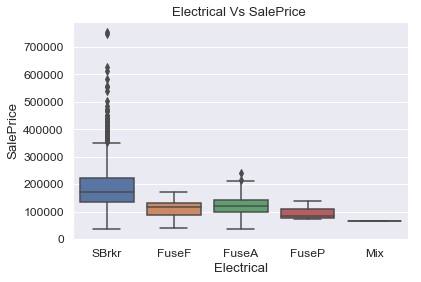

In [28]:
# Electrical
sns.boxplot('Electrical', 'SalePrice', data=train)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

# We can replace missing values with the most frequent ones.
train['Electrical'] = train['Electrical'].fillna('Sbrkr')
test['Electrical'] = test['Electrical'].fillna('Sbrkr')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


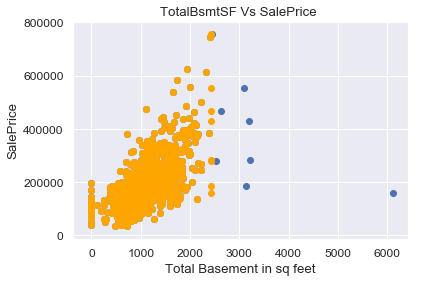

In [29]:
# Basement Features
plt.scatter(train['TotalBsmtSF'], train['SalePrice'], 
            data=train)
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

# There are a few outliers in TotalBsmtSF - let's remove
upperlimit = np.percentile(train.TotalBsmtSF.values, 99.5)
train['TotalBsmtSF'].ix[train['TotalBsmtSF'] > upperlimit] = upperlimit
plt.scatter(train['TotalBsmtSF'], train['SalePrice'].values, color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


Text(0.5, 0, 'GarageArea in sqft')

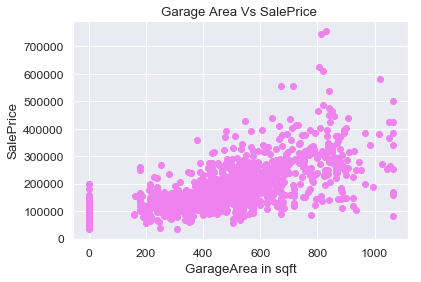

In [30]:
# Some outliers - remove by 99.5 %tile

upperlimit = np.percentile(train['GarageArea'], 99.5)
train['GarageArea'].ix[train['GarageArea'] > upperlimit] = upperlimit

plt.scatter(train.GarageArea, train['SalePrice'].values, color='violet')
plt.title('Garage Area Vs SalePrice ')
plt.ylabel('SalePrice')
plt.xlabel('GarageArea in sqft')

In [31]:
garage_cols=['GarageType','GarageQual','GarageCond',
             'GarageYrBlt','GarageFinish','GarageCars',
             'GarageArea']
train[garage_cols][train['GarageType'].isnull()==True]

# All garage related features are missing values in the same rows, 
# so we can replace catgorical variables with None and continuous
# ones with 0.
for col in garage_cols:
    if train[col].dtype == np.object:
        train[col] = train[col].fillna('None')
        test[col] = test[col].fillna('None')
    else:
        train[col] = train[col].fillna(0)
        test[col] = test[col].fillna(0)

In [32]:
train["MasVnrType"] = train["MasVnrType"].fillna('None')
train["MasVnrArea"] = train["MasVnrArea"].fillna(0.0)

test["MasVnrType"] = test["MasVnrType"].fillna('None')
test["MasVnrArea"] = test["MasVnrArea"].fillna(0.0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


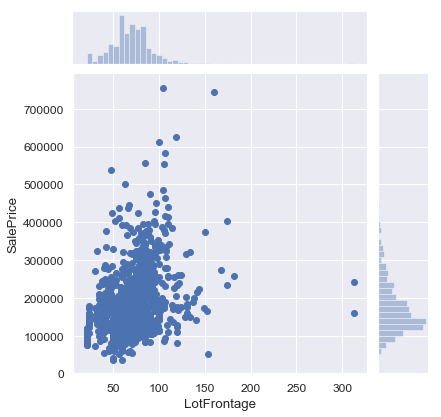

In [33]:
sns.jointplot(x="LotFrontage", y="SalePrice", data=train)

In [34]:
train['LotFrontage'] = train['LotFrontage'].fillna(np.mean(train['LotFrontage']))
test['LotFrontage'] = test['LotFrontage'].fillna(np.mean(test['LotFrontage']))

(LotFrontage, LotArea) Corr: 0.306795
(LotFrontage, SqrtLotArea) Corr: 0.476837


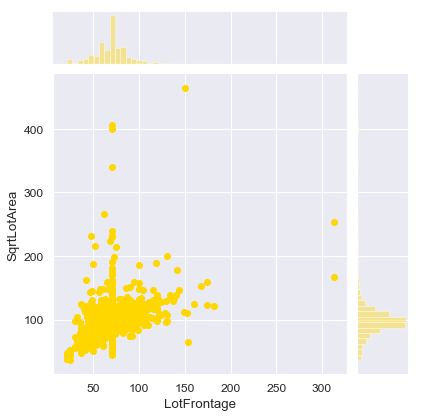

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
corr = train['LotFrontage'].corr(train['LotArea'])
print("(LotFrontage, LotArea) Corr: %.6f" % corr)

# 0.42609501877180816 isn't great, maybe try a polynomial expression
train['SqrtLotArea'] = np.sqrt(train['LotArea'])
test['SqrtLotArea'] = np.sqrt(test['LotArea'])
corr = train['LotFrontage'].corr(train['SqrtLotArea'])
print("(LotFrontage, SqrtLotArea) Corr: %.6f" % corr)

sns.jointplot(train['LotFrontage'], train['SqrtLotArea'], color='gold')
plt.show()

filter = train['LotFrontage'].isnull()
train.LotFrontage[filter] = train.SqrtLotArea[filter]

filter = test['LotFrontage'].isnull()
test.LotFrontage[filter] = test.SqrtLotArea[filter]

In [36]:
print('-------------------------------TRAIN-------------------------------')
nullcolstrain = train.columns[train.isnull().any()]
print(nullcolstrain)
print(train[nullcolstrain].isnull().sum())

print()

print('-------------------------------TEST-------------------------------')
nullcolstest = test.columns[test.isnull().any()]
print(nullcolstest)
print(test[nullcolstest].isnull().sum())

-------------------------------TRAIN-------------------------------
Index([], dtype='object')
Series([], dtype: float64)

-------------------------------TEST-------------------------------
Index([], dtype='object')
Series([], dtype: float64)


# Feature Transformations and Interactions

2.382499177054863 21.76930784887213
-0.9298387370668906 3.542445571202066


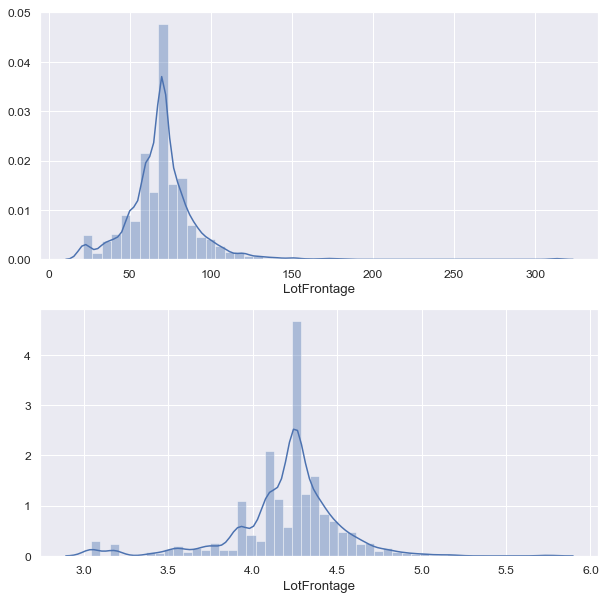

In [37]:
from scipy.stats import skew, kurtosis

fig, axs = plt.subplots(2,1, figsize=(10,10))
axs = axs.flatten()
col = "LotFrontage"
xform = np.log(train[col])
normskew, normkurt = skew(train[col]), kurtosis(train[col])
sqrtskew, sqrtkurt = skew(xform), kurtosis(xform)

print(normskew, normkurt)
print(sqrtskew, sqrtkurt)

sns.distplot(train[col], ax=axs[0])
sns.distplot(xform, ax=axs[1]);

0.3540402915902151 0.8453971535537321
-1.5458791047852773 5.766608102168151


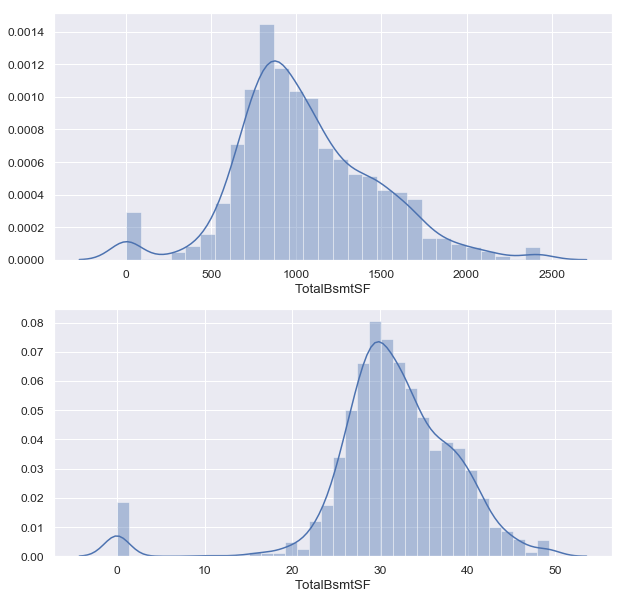

In [39]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
col = "TotalBsmtSF"
xform = np.sqrt(train[col])
normskew, normkurt = skew(train[col]), kurtosis(train[col])
sqrtskew, sqrtkurt = skew(xform), kurtosis(xform)

print(normskew, normkurt)
print(sqrtskew, sqrtkurt)

sns.distplot(train[col], ax=axs[0])
sns.distplot(xform, ax=axs[1]);

1.880940746034036 6.509812011089439
0.1212103673013655 0.8026555069117713


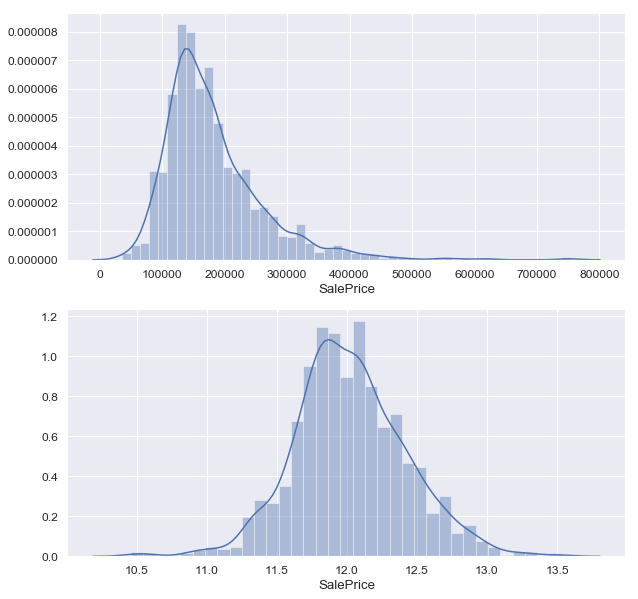

In [40]:
train_label = np.log(train['SalePrice'])
fig, axs = plt.subplots(2, 1, figsize=(10,10))
f = sns.distplot(train['SalePrice'], ax=axs[0]);
g = sns.distplot(train_label, ax=axs[1]);

sk, kurt = skew(train['SalePrice']), kurtosis(train['SalePrice'])
logsk, logkurt = skew(train_label), kurtosis(train_label)
print(sk, kurt)
print(logsk, logkurt)

# Selecting Predictors

In [117]:
thr = 0.25
corr = train.corr()
corr = corr.sort_values('SalePrice')
cols = corr['SalePrice'][corr['SalePrice'].values > thr].index.values
print(cols)

['GarageYrBlt' 'LotArea' 'HalfBath' 'OpenPorchSF' '2ndFlrSF' 'WoodDeckSF'
 'LogLotFrontage' 'LotFrontage' 'SqrtLotArea' 'BsmtFinSF1' 'Fireplaces'
 'MasVnrArea' 'YearRemodAdd' 'YearBuilt' 'TotRmsAbvGrd' 'FullBath'
 '1stFlrSF' 'GarageArea' 'GarageCars' 'TotalBsmtSF' 'GrLivArea' 'AbvGrdSF'
 'OverallQual' 'SalePrice']


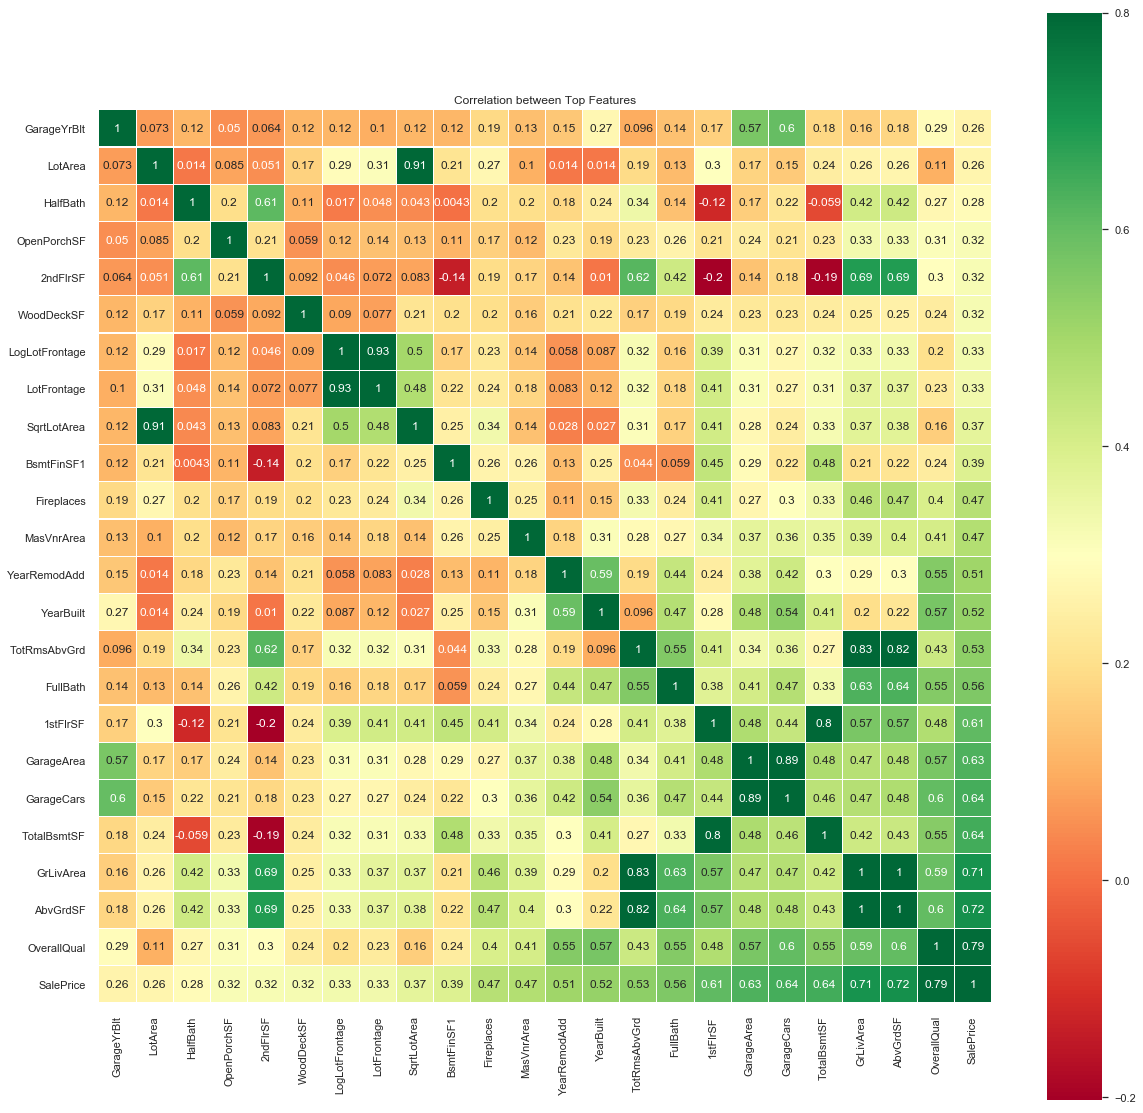

In [118]:
corrMat = train[cols].corr()
sns.set(font_scale=1)
plt.figure(figsize=(20,20))

sns.heatmap(corrMat, vmax=0.8, linewidths=0.01, 
            square=True, annot=True, cmap='RdYlGn', linecolor='white')
plt.title('Correlation between Top Features')
plt.show()

In [108]:
ind = np.where(cols=='SalePrice')
cols = np.delete(cols, ind[0][0])
to_delete_cols = ['GarageYrBlt', 'LotArea', 'LogLotFrontage', 'HalfBath', 'BsmtFinSF1', 
                  'YearRemodAdd', 'TotRmsAbvGrd', '1stFlrSF', 'FullBath', 
                  'GarageArea', 'GrLivArea']
for col in to_delete_cols:
    ind = np.where(cols==col)
    cols = np.delete(cols, ind[0][0])
print(cols)
train_sample = train[cols]
test_sample = test[cols]

['OpenPorchSF' '2ndFlrSF' 'WoodDeckSF' 'LotFrontage' 'SqrtLotArea'
 'Fireplaces' 'MasVnrArea' 'YearBuilt' 'GarageCars' 'TotalBsmtSF'
 'OverallQual']


# Normalize columns

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_sample)
train_sample = scaler.transform(train_sample)
test_sample = scaler.transform(test_sample)

In [110]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaler.fit(train_sample)
# train_sample = scaler.transform(train_sample)
# test_sample = scaler.transform(test_sample)

In [111]:
from sklearn.model_selection import train_test_split

# Create validation set
X_train, X_test, y_train, y_test = train_test_split(train_sample, 
                                                    train_label, 
                                                    train_size = 0.75)
print(X_train.shape)
print(X_test.shape)
print(test_sample.shape)

(1095, 11)
(365, 11)
(1459, 11)


# Linear Regression Model

We log-transform the target variable during training time to make the log-target variable 
linear with respect to the features so that the linear regression model could approximate 
better. Then we remember to exponentiate the target variable during test time.

In [112]:
import statsmodels.api as sm

mod = sm.OLS(y_train, X_train)
fii = mod.fit()
fii.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
x1,-2.900776,0.579552,-5.005202,6.508112e-07,-4.037947,-1.763605
x2,1.938115,0.399549,4.850763,1.409662e-06,1.154139,2.722091
x3,-1.735017,0.482319,-3.597239,3.361160e-04,-2.681402,-0.788632
x4,4.995583,0.969369,5.153437,3.037496e-07,3.093531,6.897636
x5,12.506850,1.184118,10.562170,6.884192e-25,10.183428,14.830272
x6,-1.782161,0.357366,-4.986930,7.139288e-07,-2.483369,-1.080953
x7,-6.415456,0.655214,-9.791391,9.472800e-22,-7.701088,-5.129825
x8,5.172658,0.373781,13.838737,3.154528e-40,4.439241,5.906074
x9,-1.378246,0.479196,-2.876165,4.104217e-03,-2.318503,-0.437990
x10,3.149783,0.599076,5.257737,1.756013e-07,1.974304,4.325263


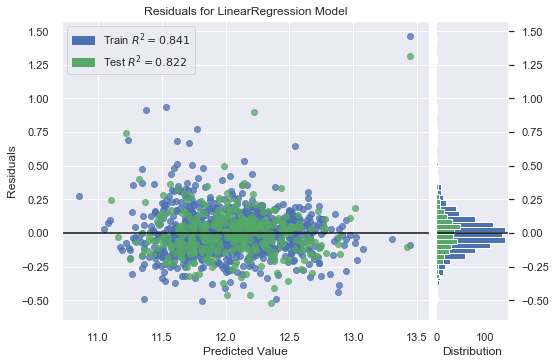

RMSE:  0.17208669919842343
R-squared:  0.8215101894668827


,ID,SalePrice
0,1461,120762.777396
1,1462,159167.990164
2,1463,177032.744716
3,1464,193323.374297
4,1465,196459.453672


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot

# Cross Validate
model = LinearRegression()
model.fit(X_train, y_train)
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

y_preds = model.predict(X_test)
rmseLR = np.sqrt(metrics.mean_squared_error(y_test, y_preds))
print("RMSE: ", rmseLR)
print("R-squared: ", metrics.r2_score(y_test, y_preds))

test_pred = np.exp(model.predict(test_sample))
submitLR = pd.DataFrame()
submitLR['ID'] = test['Id']
submitLR['SalePrice'] = test_pred
submitLR.head()

# Gradient Boosting Regressor

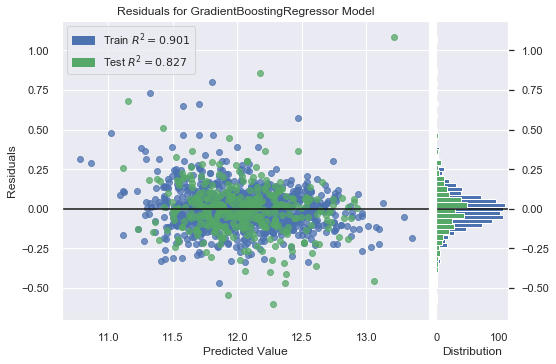

RMSE:  0.16959359429365128
R-squared:  0.8266444665683397


,ID,SalePrice
0,1461,128127.445117
1,1462,152345.743766
2,1463,171858.359329
3,1464,174183.117793
4,1465,211965.747005


In [114]:
from sklearn.ensemble import GradientBoostingRegressor

lr = 1e-2
num_ests = 500
model = GradientBoostingRegressor(learning_rate=lr, n_estimators=num_ests)
model.fit(X_train, y_train)
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

y_preds = model.predict(X_test)
rmseGB = np.sqrt(metrics.mean_squared_error(y_test, y_preds))
print("RMSE: ", rmseGB)
print("R-squared: ", metrics.r2_score(y_test, y_preds))

test_pred = np.exp(model.predict(test_sample))
submitGB = pd.DataFrame()
submitGB['ID'] = test['Id']
submitGB['SalePrice'] = test_pred
submitGB.head()

# Random Forest Regressor

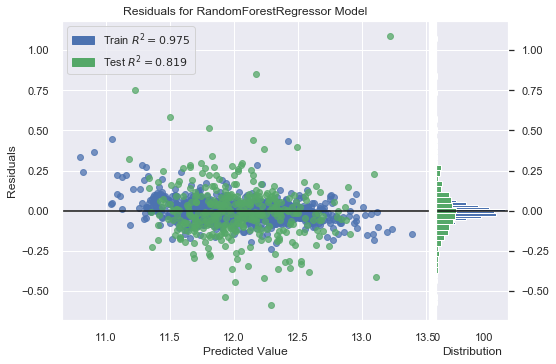

RMSE:  0.1731727581627288
R-squared:  0.8192501407129658


,ID,SalePrice
0,1461,130027.230601
1,1462,151065.122506
2,1463,173132.889536
3,1464,178161.228043
4,1465,210735.578581


In [115]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

y_preds = model.predict(X_test)

rmseRF = np.sqrt(metrics.mean_squared_error(y_test, y_preds))
print("RMSE: ", rmseRF)
print("R-squared: ", metrics.r2_score(y_test, y_preds))

test_pred = np.exp(model.predict(test_sample))
submitRF = pd.DataFrame()
submitRF['ID'] = test['Id']
submitRF['SalePrice'] = test_pred
submitRF.head()

In [51]:
rmses = np.array([rmseLR, rmseGB, rmseRF])
print(rmses)
ind = np.argmin(rmses)
if ind == 0:
    submit = submitLR
elif ind == 1:
    submit = submitGB
elif ind == 2:
    submit = submitRF
submit.to_csv('submission.csv', index=False)

[0.14363732 0.14877755 0.1546848 ]
